In [1]:
\import pandas as pd
import numpy as np
import random
import os
import cv2
import keras
from keras_preprocessing.image import ImageDataGenerator
from keras_preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import load_model
from sklearn.metrics import accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
import seaborn as sns
import random
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [16]:
import numpy as np 
import imageio
import matplotlib.pyplot as plt
from PIL import Image
from glob import iglob
import glob

In [21]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import glob
#from scipy.misc import imread
from keras.preprocessing.image import load_img,img_to_array
from keras.layers import Flatten
from glob import iglob
from sklearn.decomposition import PCA

In [6]:
images_csv = pd.read_csv('images.csv')
styles_csv = pd.read_csv('styles.csv', error_bad_lines=False)

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

In [9]:
styles_csv.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [10]:
images_csv.head()

,filename,link
0,15970.jpg,http://assets.myntassets.com/v1/images/style/p...
1,39386.jpg,http://assets.myntassets.com/v1/images/style/p...
2,59263.jpg,http://assets.myntassets.com/v1/images/style/p...
3,21379.jpg,http://assets.myntassets.com/v1/images/style/p...
4,53759.jpg,http://assets.myntassets.com/v1/images/style/p...


In [22]:
img_data, j, mask_flatten= [], -1, []
for i in glob.glob("./images/*.jpg"):
    j += 1
    if j == 10:
        break
#     temp = cv2.imread(i, cv2.IMREAD_GRAYSCALE).resize(240,180,3)
    temp = load_img(i, target_size=(240, 180, 3))
    temp = img_to_array(temp).flatten()
    img_data.append(temp)
#     img_data = img_data
    
img_data = np.array(img_data, dtype = int)
# img_data = img_data/255

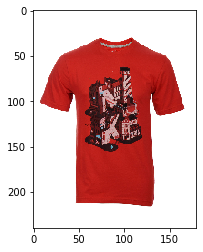

In [29]:
plt.imshow((img_data[9].reshape(240, 180,3)))

In [32]:
len(img_data)

10

In [33]:
len(styles_csv)

44424

In [34]:
styles_csv.dtypes

id                      int64
gender                 object
masterCategory         object
subCategory            object
articleType            object
baseColour             object
season                 object
year                  float64
usage                  object
productDisplayName     object
dtype: object

In [35]:
styles_csv.count()

id                    44424
gender                44424
masterCategory        44424
subCategory           44424
articleType           44424
baseColour            44409
season                44403
year                  44423
usage                 44107
productDisplayName    44417
dtype: int64

In [36]:
styles_csv_new = styles_csv.drop_duplicates()

In [37]:
styles_csv.count()

id                    44424
gender                44424
masterCategory        44424
subCategory           44424
articleType           44424
baseColour            44409
season                44403
year                  44423
usage                 44107
productDisplayName    44417
dtype: int64

In [40]:
styles_csv.describe()

,id,year
count,44424.000000,44423.000000
mean,29696.334301,2012.806497
std,17049.490518,2.126480
min,1163.000000,2007.000000
25%,14768.750000,2011.000000
50%,28618.500000,2012.000000
75%,44683.250000,2015.000000
max,60000.000000,2019.000000


In [52]:
styles_csv[styles_csv['articleType'] == "Shirts"]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt
15,12369,Men,Apparel,Topwear,Shirts,Purple,Fall,2011.0,Formal,Reid & Taylor Men Check Purple Shirts
30,37812,Men,Apparel,Topwear,Shirts,Navy Blue,Summer,2012.0,Formal,John Players Men Navy Blue Shirt
...,...,...,...,...,...,...,...,...,...,...
44322,24684,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Highlander Men Navy Blue Check Shirt
44346,23667,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Spykar Men Navy Blue Check Shirt
44351,6005,Men,Apparel,Topwear,Shirts,Red,Summer,2011.0,Casual,Highlander Men Red Blue Checked Slim Fit Shirt
44386,23031,Men,Apparel,Topwear,Shirts,White,Fall,2012.0,Formal,Arrow Men White Striped Shirt


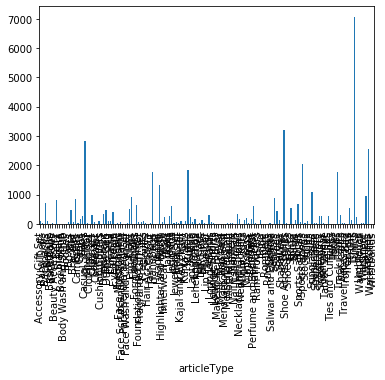

In [72]:
styles_csv.groupby(['articleType'])['id'].count().plot.bar()

In [64]:
styles_csv['articleType'].count()

44424

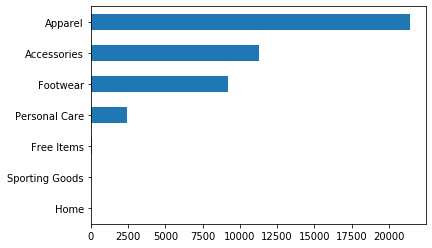

In [79]:
#plt.figure(figsize=(7,30))
styles_csv.masterCategory.value_counts().sort_values().plot(kind='barh')

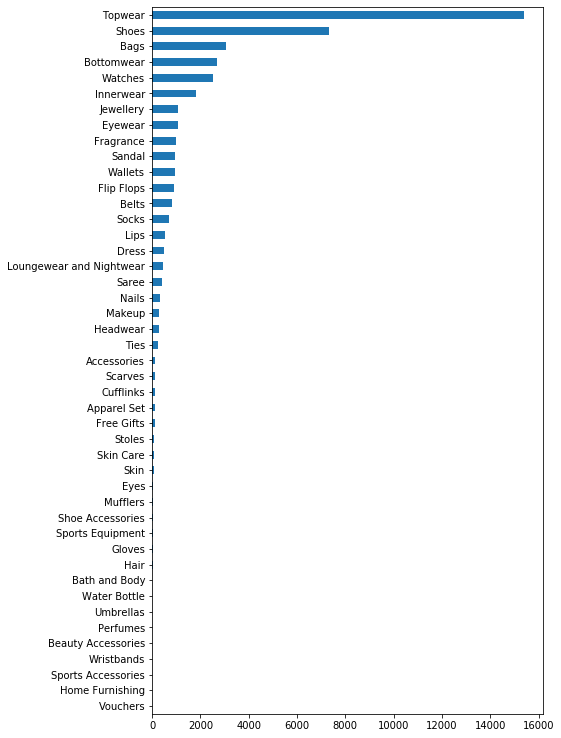

In [84]:
plt.figure(figsize=(7,13))
styles_csv.subCategory.value_counts().sort_values().plot(kind='barh')

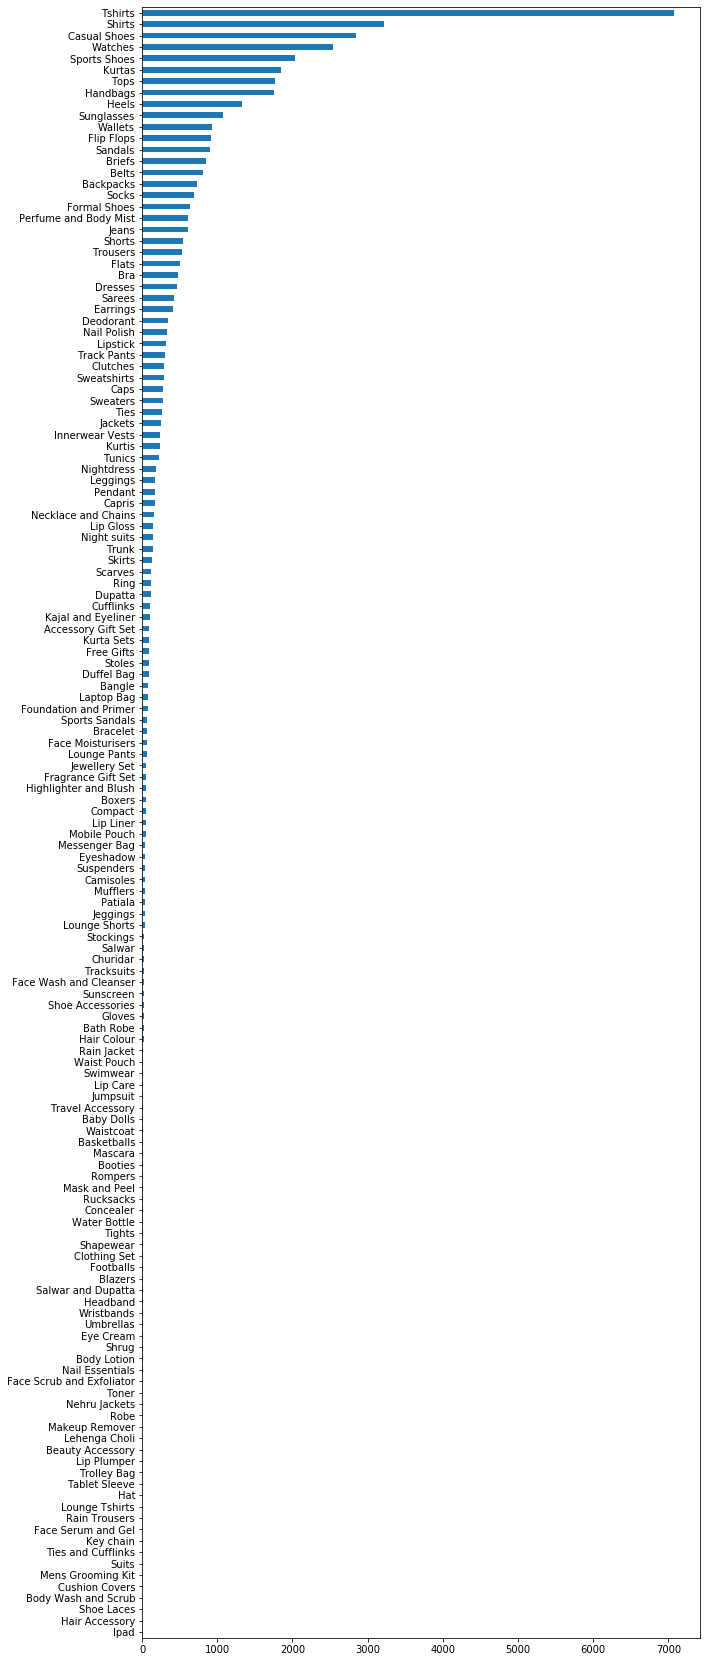

In [96]:
plt.figure(figsize=(10,30))
styles_csv.articleType.value_counts().sort_values().plot(kind='barh')

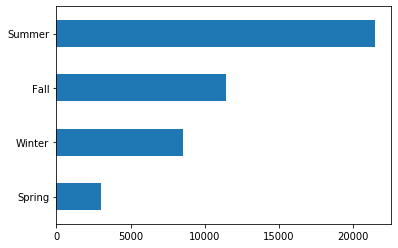

In [106]:
#plt.figure(figsize=(7,15))
styles_csv.season.value_counts().sort_values().plot(kind='barh')

In [ ]:
styles_csv.season.value_counts().sort_values().plot(kind='barh')

In [97]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(styles_csv[feat_cols].values)

NameError: name 'feat_cols' is not defined

In [99]:
from shutil import copyfile


In [100]:
a = [53575,
 27213,
 12427,
 10517,
 18921,
 14009,
 34851,
 10805,
 30096,
 26474,
 13767,
 4665,
 13702,
 18630,
 25604,
 12641,
 39855,
 26597,
 40030,
 6228,
 31235,
 5461,
 5373,
 33766,
 8187,
 32356,
 12017,
 3046,
 24180,
 4691,
 38005,
 42019,
 17163,
 17565,
 51409,
 32369,
 15257,
 30117,
 16554,
 9258,
 26612,
 7888,
 42165,
 6680,
 59944,
 8805,
 43043,
 13191,
 41233,
 20188,
 8802,
 21741,
 6362,
 29466,
 13733,
 10384,
 9603,
 13361,
 33841,
 3440,
 26086,
 43885,
 38654,
 34315,
 13357,
 52075,
 5389,
 6446,
 46500,
 24805,
 38973,
 5726,
 15892,
 38653,
 20175,
 5698,
 11202,
 10142,
 6764,
 34856,
 2504,
 37769,
 22846,
 39864,
 10174,
 30322,
 57481,
 44779]

In [104]:
img_data, j = [], -1

for i in a:
    file_path = "C:\\Users\\farha\\OneDrive\\Documents\\GitHub\\Fashion_dataset_uml\\{}.jpg".format(str(i))
    copyfile('./images/{}.jpg'.format(i), file_path)

In [138]:
styles_csv.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


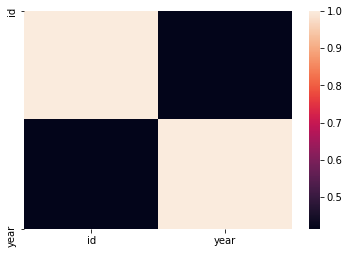

In [110]:
# Calculate correlations
corr = styles_csv.corr()
 
# Heatmap
sns.heatmap(corr)

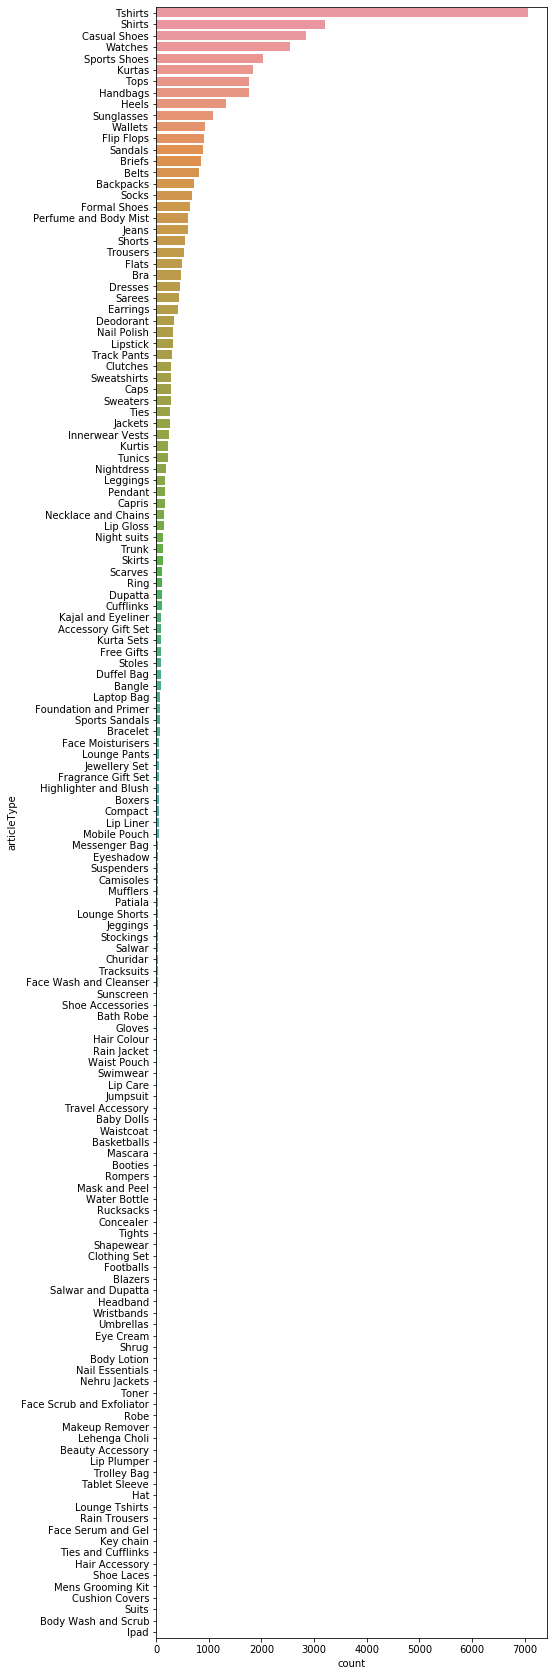

In [134]:
plt.figure(figsize=(7,30))
sns.countplot(y = "articleType", 
              data = styles_csv, 
              order = styles_csv['articleType'].value_counts().index)

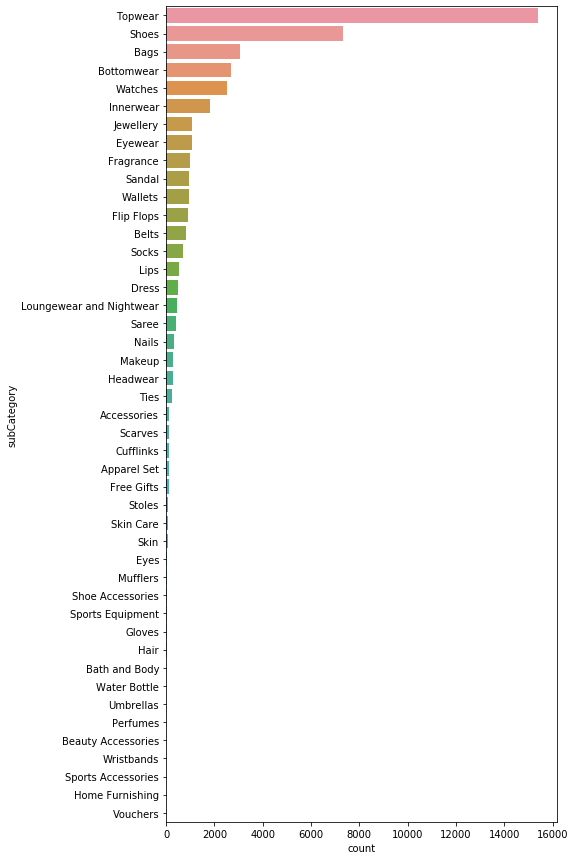

In [170]:
plt.figure(figsize=(7,15))
sns.countplot(y = "subCategory", 
              data = styles_csv, 
              order = styles_csv['subCategory'].value_counts().index)

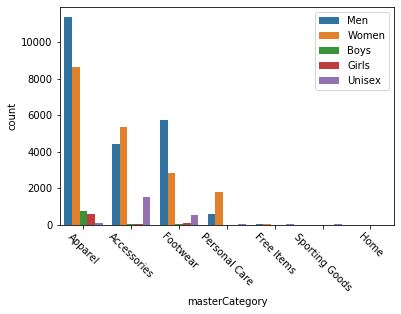

In [178]:
sns.countplot(x = "masterCategory",
              hue = "gender",
              data = styles_csv, 
              order = styles_csv['masterCategory'].value_counts().index)
plt.xticks(rotation= -45)
plt.legend(loc = "upper right")
plt.show()

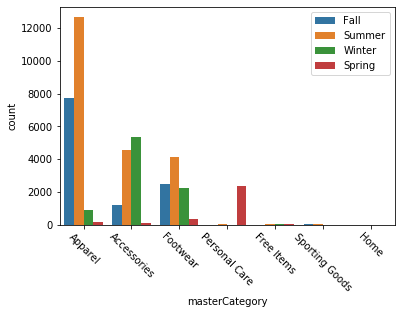

In [179]:
sns.countplot(x = "masterCategory",
              hue = "season",
              data = styles_csv, 
              order = styles_csv['masterCategory'].value_counts().index)
plt.xticks(rotation= -45)
plt.legend(loc = "upper right")
plt.show()

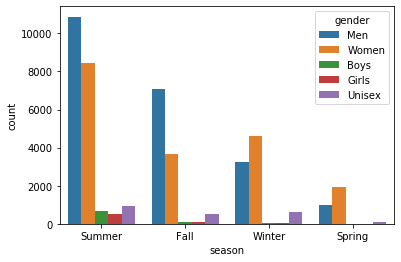

In [140]:
sns.countplot(x = "season",
              hue = "gender",
              data = styles_csv, 
              order = styles_csv['season'].value_counts().index)

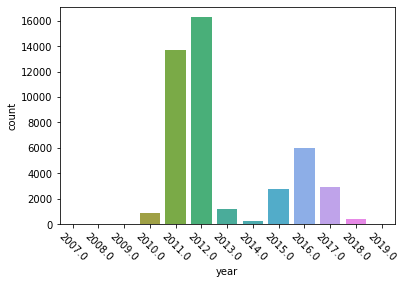

In [175]:
s = sns.countplot(x = "year",
              data = styles_csv)
for i, v in s.reset_index().iterrows():
    ax.text(i, v.umpires + 0.2 , v.umpires, color='red')
#plt.xticks(rotation= -45)
#plt.show()

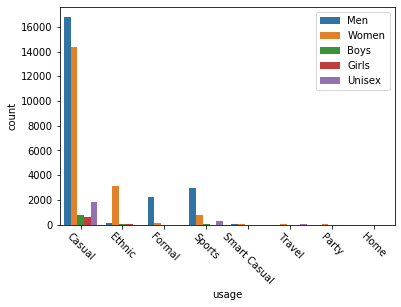

In [176]:
sns.countplot(x = "usage",
              hue = "gender",
              data = styles_csv)
plt.xticks(rotation= -45)
plt.legend(loc = "upper right")
plt.show()

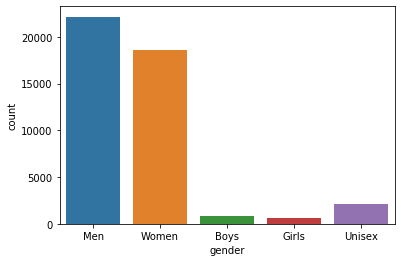

In [167]:
sns.countplot(x = "gender",
              data = styles_csv)

In [182]:
styles_heat = styles_csv.drop(['id', 'productDisplayName', 'year'], axis = 1)